In [ ]:
!git clone https://github.com/MMedzin/UFold.git

Cloning into 'UFold'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 263 (delta 108), reused 71 (delta 71), pack-reused 135
Receiving objects: 100% (263/263), 507.25 KiB | 5.07 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [ ]:
!unzip UFold/data/SIwB-lab-07-data.zip

In [ ]:
!rm -r UFold/data/SIwB-lab-07-data/ArchiveII_bpseq \
UFold/data/SIwB-lab-07-data/PDB_bpseq

In [ ]:
!mkdir UFold/data/SIwB-lab-07-data/ArchiveII_bpseq \
UFold/data/SIwB-lab-07-data/PDB_bpseq

In [ ]:
!cp UFold/data/SIwB-lab-07-data/ArchiveII/*.bpseq UFold/data/SIwB-lab-07-data/ArchiveII_bpseq

In [ ]:
!cp UFold/data/SIwB-lab-07-data/PDB/*.bpseq UFold/data/SIwB-lab-07-data/PDB_bpseq

In [ ]:
from pathlib import Path
import shutil

def split_directory(directory_path, data_fraction=0.1):
    # Create subdirectories
    subdirectories = [directory_path / "train", directory_path / "test", directory_path / "valid"]
    for subdirectory in subdirectories:
        subdirectory.mkdir(parents=True, exist_ok=True)
    
    # Iterate through files in the directory
    for i, file_path in enumerate(directory_path.iterdir()):
        if file_path.is_file():
            # Calculate the modulo result
            modulo_result = i % (5 / data_fraction) 
            
            # Determine the target subdirectory based on the modulo result
            if modulo_result in [0, 1, 2]:
                target_subdirectory = subdirectories[0]
            elif modulo_result == 3:
                target_subdirectory = subdirectories[1]
            elif modulo_result == 4:
                target_subdirectory = subdirectories[2]
            else:
              continue
            
            # Move the file to the target subdirectory
            shutil.move(str(file_path), str(target_subdirectory))

In [ ]:
directory_path = Path('UFold/data/SIwB-lab-07-data/PDB_bpseq')
split_directory(directory_path, 1)

directory_path = Path('UFold/data/SIwB-lab-07-data/ArchiveII_bpseq')
split_directory(directory_path, 0.1)

In [ ]:
!cd UFold && python process_data_newdataset.py data/SIwB-lab-07-data/ArchiveII_bpseq/train data/ArchiveII_train.cPickle
!cd UFold && python process_data_newdataset.py data/SIwB-lab-07-data/ArchiveII_bpseq/test data/ArchiveII_test.cPickle
!cd UFold && python process_data_newdataset.py data/SIwB-lab-07-data/ArchiveII_bpseq/valid data/ArchiveII_valid.cPickle

current processing 1/240
237
current processing 1/80
79
current processing 1/80
76


In [ ]:
!cd UFold && python process_data_newdataset.py data/SIwB-lab-07-data/PDB_bpseq/train data/PDB_train.cPickle
!cd UFold && python process_data_newdataset.py data/SIwB-lab-07-data/PDB_bpseq/test data/PDB_test.cPickle
!cd UFold && python process_data_newdataset.py data/SIwB-lab-07-data/PDB_bpseq/valid data/PDB_valid.cPickle

current processing 1/356
330
current processing 1/119
110
current processing 1/119
108


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install munch==2.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!cd UFold/ && \
python ufold_train.py \
--train_files ArchiveII_train ArchiveII_valid \
--model_pt_tag ArchiveII_unet

#####Stage 1#####
Here is the configuration of this run: 
Munch({'gpu': '1', 'u_net_d': 2, 'BATCH_SIZE': 1, 'batch_size_stage_1': 1, 'OUT_STEP': 10, 'LOAD_MODEL': True, 'rho_per_position': 'matrix', 'data_type': 'rnastralign_all_600', 'model_type': 'pretrained', 'epoches_first': 10, 'step_gamma': 1, 'k': 1})
Loading dataset:  ArchiveII_train
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Loading dataset:  ArchiveII_valid
Data Loading Done!!!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than

In [ ]:
!cd UFold/ && \
python ufold_train.py \
--train_files PDB_train PDB_valid \
--model_pt_tag PDB_unet

#####Stage 1#####
Here is the configuration of this run: 
Munch({'gpu': '1', 'u_net_d': 2, 'BATCH_SIZE': 1, 'batch_size_stage_1': 1, 'OUT_STEP': 10, 'LOAD_MODEL': True, 'rho_per_position': 'matrix', 'data_type': 'rnastralign_all_600', 'model_type': 'pretrained', 'epoches_first': 10, 'step_gamma': 1, 'k': 1})
Loading dataset:  PDB_train
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Loading dataset:  PDB_valid
Data Loading Done!!!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this D

Eval

In [ ]:
!cd UFold/ && \
python ufold_test.py --test_files PDB_test \
--model_pt_tag ../PDB_unet_9.pt


Loading test file:  PDB_test
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Max seq length  600
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
==========Start Loading==========
==========Finish Loading==========
Batch number:  0
Average testing

In [ ]:
!cd UFold/ && \
python ufold_test.py --test_files ArchiveII_test \
--model_pt_tag ../ArchiveII_unet_9.pt


Loading test file:  ArchiveII_test
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Max seq length  600
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
==========Start Loading==========
==========Finish Loading==========
Batch number:  0
Average t

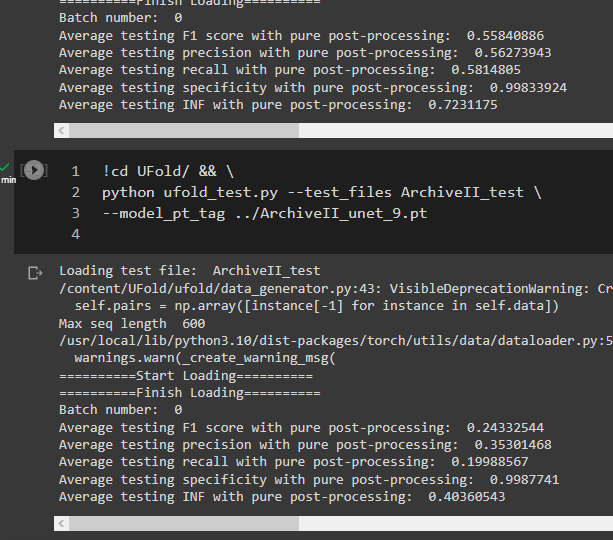

Transfer learning

In [ ]:
!cd UFold/ && \
python ufold_train.py \
--train_files PDB_train PDB_valid \
--model_pt_tag ArchiveII_PDB_unet

#####Stage 1#####
Here is the configuration of this run: 
Munch({'gpu': '1', 'u_net_d': 2, 'BATCH_SIZE': 1, 'batch_size_stage_1': 1, 'OUT_STEP': 10, 'LOAD_MODEL': True, 'rho_per_position': 'matrix', 'data_type': 'rnastralign_all_600', 'model_type': 'pretrained', 'epoches_first': 10, 'step_gamma': 1, 'k': 1})
Loading dataset:  PDB_train
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Loading dataset:  PDB_valid
Data Loading Done!!!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this D

Transfered eval

In [ ]:
!mkdir UFold/data/SIwB-lab-07-data/joined
!mkdir UFold/data/SIwB-lab-07-data/joined/test
!cp UFold/data/SIwB-lab-07-data/ArchiveII_bpseq/test/* UFold/data/SIwB-lab-07-data/joined/test
!cp UFold/data/SIwB-lab-07-data/PDB_bpseq/test/* UFold/data/SIwB-lab-07-data/joined/test

In [ ]:
!cd UFold && python process_data_newdataset.py data/SIwB-lab-07-data/joined/test data/joined_test.cPickle

current processing 1/199
189


In [ ]:
!cd UFold/ && \
python ufold_test.py --test_files joined_test \
--model_pt_tag ../ArchiveII_PDB_unet_9.pt

Loading test file:  joined_test
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Max seq length  600
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
==========Start Loading==========
==========Finish Loading==========
Batch number:  0
Average test

In [ ]:
!cd UFold/ && \
python ufold_test.py --test_files ArchiveII_test \
--model_pt_tag ../ArchiveII_PDB_unet_9.pt

Loading test file:  ArchiveII_test
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Max seq length  600
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
==========Start Loading==========
==========Finish Loading==========
Batch number:  0
Average t

In [ ]:
!cd UFold/ && \
python ufold_test.py --test_files PDB_test \
--model_pt_tag ../ArchiveII_PDB_unet_9.pt

Loading test file:  PDB_test
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Max seq length  600
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
==========Start Loading==========
==========Finish Loading==========
Batch number:  0
Average testing

In [ ]:
!cd UFold/ && \
python ufold_test.py --test_files joined_test \
--model_pt_tag ../ArchiveII_unet_9.pt

Loading test file:  joined_test
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Max seq length  600
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
==========Start Loading==========
==========Finish Loading==========
Batch number:  0
Average test

In [ ]:
!cd UFold/ && \
python ufold_test.py --test_files joined_test \
--model_pt_tag ../PDB_unet_9.pt

Loading test file:  joined_test
/content/UFold/ufold/data_generator.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pairs = np.array([instance[-1] for instance in self.data])
Max seq length  600
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
==========Start Loading==========
==========Finish Loading==========
Batch number:  0
Average test